In [1]:
import re
import sqlite3
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import MonthLocator, DateFormatter
import random
import dataset
import collections
import numpy as np
conn = sqlite3.connect('yelp.db')
db = dataset.connect('sqlite:///yelp.db')

In [2]:
%load_ext sql
%sql sqlite:///yelp.db
%matplotlib inline

//anaconda/lib/python2.7/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
//anaconda/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


### Create business_info table

In [ ]:
CREATE TABLE business_info(
    business_id INT PRIMARY KEY NOT NULL,
    name TEXT,
    full_address TEXT,
    city TEXT,
    state TEXT,
    latitude REAL,
    longitude REAL,
    stars REAL,
    review_count INT,
    open INT,
    price_range INT
    )

In [129]:
%%sql
UPDATE business_info
SET price_range=NULL
WHERE business_id = '5UmKMjUEUNdYWqANhGckJw'

1 rows affected.


[]

In [184]:
%%sql
SELECT COUNT(*) FROM business_info LIMIT 5;

Done.


COUNT(*)
85901


### Create business categories table

In [47]:
%%sql

CREATE TABLE business_categories(
    business_id INT,
    category TEXT,
    FOREIGN KEY(business_id) REFERENCES business_info(business_id)
)

(sqlite3.OperationalError) table business_categories already exists [SQL: u'CREATE TABLE business_categories(\n    business_id INT,\n    category TEXT,\n    FOREIGN KEY(business_id) REFERENCES business_info(business_id)\n)']


In [45]:
%%sql

DROP TABLE business_categories

Done.


[]

### Create user table

In [69]:
%%sql

CREATE TABLE user(
    user_id INT PRIMARY KEY NOT NULL,
    name TEXT,
    review_count INT,
    average_stars REAL,
    votes_funny INT,
    votes_useful INT,
    votes_cool INT,
    yelping_since TEXT,
    fans INT
)

Done.


[]

In [76]:
%%sql
-- SELECT * FROM user ORDER BY yelping_since DESC LIMIT 10;
SELECT COUNT(*) FROM user

Done.


COUNT(*)
686556


### Create review table

In [18]:
%%sql
DROP TABLE review

Done.


[]

In [19]:
%%sql

CREATE TABLE review(
    business_id INT,
    user_id INT,
    stars REAL,
    text TEXT,
    date TEXT,
    year INT,
    month INT,
    day INT, 
    votes_funny INT,
    votes_useful INT,
    votes_cool INT,
    FOREIGN KEY(business_id) REFERENCES business_info(business_id),
    FOREIGN KEY(user_id) REFERENCES user(user_id)
)

Done.


[]

Must create index on business_id or aggregate functions will be very slow

In [22]:
%%sql
SELECT * FROM review LIMIT 10;

Done.


business_id,user_id,stars,text,date,year,month,day,votes_funny,votes_useful,votes_cool
5UmKMjUEUNdYWqANhGckJw,PUFPaY9KxDAcGqfsorJp3Q,4.0,"Mr Hoagie is an institution. Walking in, it does seem like a throwback to 30 years ago, old fashioned menu board, booths out of the 70s, and a large selection of food. Their speciality is the Italian Hoagie, and it is voted the best in the area year after year. I usually order the burger, while the patties are obviously cooked from frozen, all of the other ingredients are very fresh. Overall, its a good alternative to Subway, which is down the road.",2012-08-01,2012,8,1,0,0,0
5UmKMjUEUNdYWqANhGckJw,Iu6AxdBYGR4A0wspR9BYHA,5.0,"Excellent food. Superb customer service. I miss the mario machines they used to have, but it's still a great place steeped in tradition.",2014-02-13,2014,2,13,0,0,0
5UmKMjUEUNdYWqANhGckJw,auESFwWvW42h6alXgFxAXQ,5.0,Yes this place is a little out dated and not opened on the weekend. But other than that the staff is always pleasant and fast to make your order. Which is always spot on fresh veggies on their hoggies and other food. They also have daily specials and ice cream which is really good. I had a banana split they piled the toppings on. They win pennysaver awards ever years i see why.,2015-10-31,2015,10,31,1,1,0
5UmKMjUEUNdYWqANhGckJw,qiczib2fO_1VBG8IoCGvVg,3.0,"PROS: Italian hoagie was delicious. Friendly counter employee. The restaurant was clean and neat. CONS: The pizza was not good. Pre-formed crust, NOT fresh dough. The price of the failure of a pizza WAS NOT CHEAP EITHER. I guess the name says it all. Get the hoagie, pass on the pizza.",2015-12-26,2015,12,26,0,0,0
5UmKMjUEUNdYWqANhGckJw,qEE5EvV-f-s7yHC0Z4ydJQ,2.0,"First the only reason this place could possibly win best hoagie is because there's no competition. Two hoagies and a side of onion rings cost $25.74So I'm thinking with the reader choice awards and $10 per 12"" hoagie these will be awesome. I was sadly mistaken. The only reason I didn't give one star is because is the bread & dressing is fairly decent. So on to the hoagies, the Italian is general run of the mill. Minimal meat and a ton of shredded lettuce. You get more meat at subway. Nothing really special & NOT worthy of the $10 price tag. Second, the steak hoagie, it is atrocious. No cheese?!?!? You have to add cheese for $1 so now the steak hoagie is $11. That has so little amounts of meat that I thought I was eating a lettuce & onion hoagie. I am thoroughly disappointed with this hoagie, possibly the worst value of a hoagie I've ever eaten. I'm not say eating at subway is any better, but for the huge price difference you are better off doing so. Check out pasquales down the road, better hoagie & price.",2016-04-08,2016,4,8,0,1,0
5UmKMjUEUNdYWqANhGckJw,jBoH6qKGO7wdYyg_YjBcQA,1.0,"Normally, I do not do reviews of an establishment unless the rating is exceptionally great or exceptionally bad. If I had not felt sucker punched and mugged after I left Mr. Hoagie, I would not be writing this bad review. On my first and last trip there, I paid $24.59 for two whole hoagies. 1) The Italian (ordered because the woman (she) working there told me it was their most popular hoagie) I ordered with lettuce and onions (no tomato, italian dressing which all come free with the hoagie). I had to pay $1 to add cheese to the hoagie. Because I was traveling and would not be eating the hoagie right away, I asked for the italian on the side. She told me there was a charge for the dressing on the side. I passed on that on principle. Are you kidding me? I just saved her money by declining the tomato. I was not going to pay for the dressing on the side. At this point, I am certain something is not right and this place appears to me to be in financial trouble. That pales in comparison to what happened next. I opened the hoagie and there were three microscopically thin slices of meat on this hoagie. Ham, salami, and bologna. Bologna!?!?!?!? Who in the hell puts disgusting bo

### Create tips table

In [117]:
%%sql
    
CREATE TABLE tip(
    business_id INT,
    user_id INT,
    text TEXT,
    date TEXT,
    year INT,
    month INT,
    day INT,
    likes INT,
    FOREIGN KEY(business_id) REFERENCES business_info(business_id),
    FOREIGN KEY(user_id) REFERENCES user(user_id)
)
        

Done.


[]

In [120]:
"""648,902 rows total from file word count"""
%%sql

SELECT COUNT(*) FROM tip;

Done.


COUNT(*)
648902


In [116]:
%%sql
--DROP TABLE tip

Done.


[]

In [9]:
%%sql

WITH businesses AS (
    SELECT *
    FROM business_info
    WHERE review_count>30
    ORDER BY RANDOM()
    LIMIT 1
)
SELECT businesses.business_id, year, month, COUNT()
FROM businesses
INNER JOIN review ON businesses.business_id=review.business_id
GROUP BY businesses.business_id, year, month



Done.


business_id,year,month,COUNT()
T8-P1-wD99kle299ixDItw,2014,9,4
T8-P1-wD99kle299ixDItw,2014,10,3
T8-P1-wD99kle299ixDItw,2014,11,3
T8-P1-wD99kle299ixDItw,2014,12,1
T8-P1-wD99kle299ixDItw,2015,1,4
T8-P1-wD99kle299ixDItw,2015,2,2
T8-P1-wD99kle299ixDItw,2015,3,1
T8-P1-wD99kle299ixDItw,2015,4,2
T8-P1-wD99kle299ixDItw,2015,5,1
T8-P1-wD99kle299ixDItw,2015,6,3


In [10]:
%%sql
--ALTER TABLE review ADD COLUMN day int;
--SELECT * FROM review LIMIT 1;

Done.


[]

### Visualize Review trends

In [13]:
c = conn.cursor()
c.execute("""
WITH businesses AS (
    SELECT *
    FROM business_info
    WHERE review_count>30
    ORDER BY RANDOM()
    LIMIT 1
)
SELECT businesses.business_id, review.year, review.month, COUNT(), AVG(review.stars)
FROM businesses
INNER JOIN review ON businesses.business_id=review.business_id
INNER JOIN tip ON businesses.business_id=tip.business_id
GROUP BY businesses.business_id, review.year, review.month
""")
result = c.fetchall()
print result

# def add_month(a_date):
#     if a_date.month==12:
#         return datetime(a_date.year+1, 1, 1)
#     else:
#         return datetime(a_date.year, a_date.month+1, 1)
    
# year_month = [datetime(result[0][1], result[0][2], 1)]
# num_reviews = [result[0][3]]
# stars = [result[0][4]]
# ##Interpolate months with no reviews with 0 counts
# for i in xrange(1, len(result)-1):
#     prev_date = year_month[-1]
#     next_tup = result[i]
#     next_date = datetime(next_tup[1], next_tup[2], 1)
#     curr_date = add_month(prev_date)
#     while curr_date < next_date:
#         year_month.append(curr_date)
#         num_reviews.append(0)
#         stars.append(stars[-1])
#         curr_date = add_month(curr_date)
#     year_month.append(next_date)
#     num_reviews.append(next_tup[3])
#     stars.append(next_tup[4])
    
# f = plt.figure(figsize=(20,6))
# plt.plot_date(year_month, num_reviews,'b')
# plt.plot_date(year_month, stars,'r')
# x1,x2,y1,y2 = plt.axis()
# plt.axis((x1,x2,0,y2))

# #print related business info
# c.execute("""
# SELECT * FROM business_info WHERE business_id='%s'
# """%result[0][0])
# print c.fetchall()


[(u'WeazuRU46Se2lnBMZdEGKQ', 2010, 3, 7, 5.0), (u'WeazuRU46Se2lnBMZdEGKQ', 2010, 8, 7, 5.0), (u'WeazuRU46Se2lnBMZdEGKQ', 2011, 2, 7, 5.0), (u'WeazuRU46Se2lnBMZdEGKQ', 2011, 6, 7, 5.0), (u'WeazuRU46Se2lnBMZdEGKQ', 2011, 8, 7, 5.0), (u'WeazuRU46Se2lnBMZdEGKQ', 2011, 9, 7, 5.0), (u'WeazuRU46Se2lnBMZdEGKQ', 2012, 1, 7, 5.0), (u'WeazuRU46Se2lnBMZdEGKQ', 2012, 8, 7, 5.0), (u'WeazuRU46Se2lnBMZdEGKQ', 2013, 4, 7, 5.0), (u'WeazuRU46Se2lnBMZdEGKQ', 2013, 5, 7, 5.0), (u'WeazuRU46Se2lnBMZdEGKQ', 2013, 8, 14, 5.0), (u'WeazuRU46Se2lnBMZdEGKQ', 2013, 9, 14, 5.0), (u'WeazuRU46Se2lnBMZdEGKQ', 2013, 10, 7, 5.0), (u'WeazuRU46Se2lnBMZdEGKQ', 2013, 11, 7, 3.0), (u'WeazuRU46Se2lnBMZdEGKQ', 2013, 12, 14, 5.0), (u'WeazuRU46Se2lnBMZdEGKQ', 2014, 2, 7, 5.0), (u'WeazuRU46Se2lnBMZdEGKQ', 2014, 3, 21, 5.0), (u'WeazuRU46Se2lnBMZdEGKQ', 2014, 4, 35, 4.2), (u'WeazuRU46Se2lnBMZdEGKQ', 2014, 5, 14, 5.0), (u'WeazuRU46Se2lnBMZdEGKQ', 2014, 6, 7, 5.0), (u'WeazuRU46Se2lnBMZdEGKQ', 2014, 7, 28, 4.5), (u'WeazuRU46Se2lnBMZdEG

(735112.0, 736116.0, 0, 6.0)

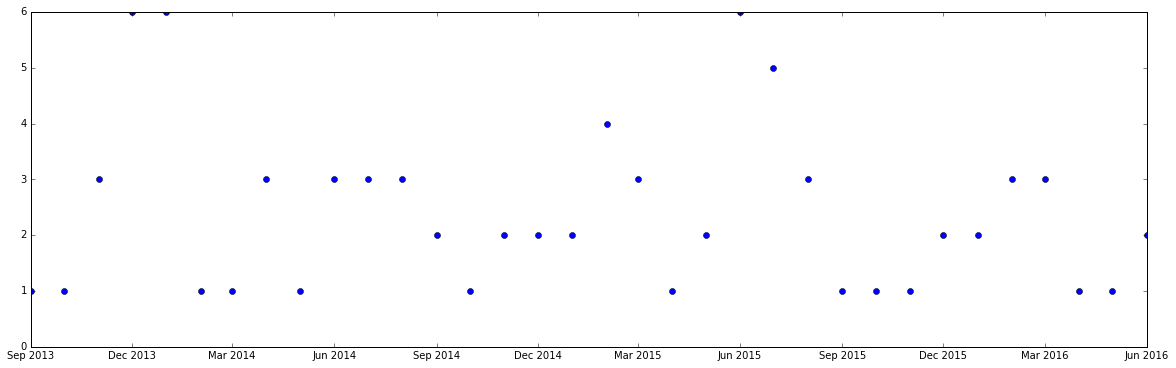

In [98]:
f = plt.figure(figsize=(20,6))
plt.plot_date(year_month, num_reviews,'bo')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0,y2))

In [48]:
%%sql

SELECT MAX(date)
FROM review

--min date: 2004-10-12

Done.


MIN(date)
2004-10-12


In [214]:
%%sql

SELECT * FROM business_info WHERE business_id='WzmcJ-VYAV7fHS_fyPAOqw';

Done.


business_id,name,full_address,city,state,latitude,longitude,stars,review_count,open,price_range
WzmcJ-VYAV7fHS_fyPAOqw,19th Donut Hole,"116 N Lindsay RdSte 17Mesa, AZ 85213",Mesa,AZ,33.4180666,-111.7720394,4.0,52,1,1


In [192]:
i = random.randrange(0,85902)

In [195]:
%%sql
WITH businesses AS (
    SELECT *
    FROM business_info
    WHERE review_count>30
    LIMIT 1 OFFSET :i
), business_review AS( --review stats per year-month
    SELECT businesses.business_id, year, month, COUNT() AS review_count, AVG(review.stars) AS avg_stars,
              SUM(votes_funny) AS votes_funny, SUM(votes_cool) AS votes_cool, SUM(votes_useful) AS votes_useful
    FROM businesses
    INNER JOIN review ON businesses.business_id=review.business_id
    GROUP BY businesses.business_id, year, month
), business_tip AS( --tip count per year-month
    SELECT businesses.business_id, year, month, COUNT() AS tip_count
    FROM businesses
    INNER JOIN tip ON businesses.business_id=tip.business_id
    GROUP BY businesses.business_id, year, month
), combined AS (--Use two left joins to do full outer join on business_id, year, month
    SELECT business_review.*, business_tip.business_id AS business_id_2, business_tip.year AS year_2, 
            business_tip.month AS month_2, business_tip.tip_count
    FROM business_review 
    LEFT JOIN business_tip 
        ON business_review.business_id = business_tip.business_id
        AND business_review.year = business_tip.year
        AND business_review.month = business_tip.month
    UNION ALL
    SELECT business_review.*, business_tip.*
    FROM business_tip
         LEFT JOIN business_review
            ON business_review.business_id = business_tip.business_id
            AND business_review.year = business_tip.year
            AND business_review.month = business_tip.month
    WHERE business_review.business_id IS NULL
) --finally construct table with both reviews and tips. Combine business_id, year, and month columns
SELECT CASE WHEN business_id IS NULL THEN business_id_2 ELSE business_id END AS business_id,
        CASE WHEN business_id IS NULL THEN year_2 ELSE year END AS year,
        CASE WHEN business_id IS NULL THEN month_2 ELSE month END AS month,
        COALESCE(review_count, 0) AS review_count, avg_stars, COALESCE(votes_funny, 0) AS votes_funny,
        COALESCE(votes_cool, 0) AS votes_cool, COALESCE(votes_useful, 0) AS votes_useful,
        COALESCE(tip_count, 0) AS tip_count
FROM combined
ORDER BY year, month


Done.


business_id,year,month,review_count,avg_stars,votes_funny,votes_cool,votes_useful,tip_count
WzmcJ-VYAV7fHS_fyPAOqw,2011,1,1,3.0,0,0,0,0
WzmcJ-VYAV7fHS_fyPAOqw,2011,4,1,4.0,1,0,0,0
WzmcJ-VYAV7fHS_fyPAOqw,2011,5,1,5.0,0,0,5,0
WzmcJ-VYAV7fHS_fyPAOqw,2011,7,1,5.0,2,2,3,0
WzmcJ-VYAV7fHS_fyPAOqw,2011,10,1,1.0,0,0,0,1
WzmcJ-VYAV7fHS_fyPAOqw,2011,12,1,1.0,1,0,2,0
WzmcJ-VYAV7fHS_fyPAOqw,2012,5,1,5.0,0,0,2,0
WzmcJ-VYAV7fHS_fyPAOqw,2012,6,1,5.0,0,0,3,0
WzmcJ-VYAV7fHS_fyPAOqw,2012,11,2,5.0,0,1,0,0
WzmcJ-VYAV7fHS_fyPAOqw,2013,2,1,5.0,0,2,0,1


In [253]:
result = db.query("""
        SELECT *
        FROM business_info 
        WHERE review_count>30
        LIMIT 4;
        """)
for r in result:
    print r

OrderedDict([(u'business_id', u'eT5Ck7Gg1dBJobca9VFovw'), (u'name', u'Giant Eagle'), (u'full_address', u'420 Waterfront Dr E\nHomestead\nHomestead, PA 15120'), (u'city', u'Homestead'), (u'state', u'PA'), (u'latitude', 40.4111498), (u'longitude', -79.908469), (u'stars', 3.5), (u'review_count', 31), (u'open', 1), (u'price_range', 2)])
OrderedDict([(u'business_id', u'bDK_jzy3Shx7jfn8_plNoA'), (u'name', u'Pizza Italia'), (u'full_address', u'4512 Liberty Ave\nBloomfield\nPittsburgh, PA 15224'), (u'city', u'Pittsburgh'), (u'state', u'PA'), (u'latitude', 40.4626986), (u'longitude', -79.9515229), (u'stars', 4.0), (u'review_count', 31), (u'open', 1), (u'price_range', 2)])
OrderedDict([(u'business_id', u'LHyGQnuWR2q44bsrw1ZLAg'), (u'name', u'Bagel Factory'), (u'full_address', u'5825 Ellsworth Ave\nShadyside\nPittsburgh, PA 15232'), (u'city', u'Pittsburgh'), (u'state', u'PA'), (u'latitude', 40.456737), (u'longitude', -79.9301601), (u'stars', 3.0), (u'review_count', 31), (u'open', 1), (u'price_ran

In [354]:
%%sql
SELECT DISTINCT city
FROM business_info
ORDER BY city

Done.


city
""
110 Las Vegas
Ahwahtukee
Ahwatukee
Ahwatukee Foothills Village
Allegheny
Allentown
Anjou
Anthem
Apache Junction


In [3]:
%%sql
SELECT * FROM business_categories WHERE business_id='eT5Ck7Gg1dBJobca9VFovw';

Done.


business_id,category
eT5Ck7Gg1dBJobca9VFovw,Food
eT5Ck7Gg1dBJobca9VFovw,Grocery


In [258]:
import pandas as pd

In [356]:
with open('columns.csv','r') as f:
    cols = f.readline().strip().split(',')
print cols
print len(cols)

['latitude', 'longitude', 'price_range', 'one_hot_', 'one_hot_AK', 'one_hot_AL', 'one_hot_AZ', 'one_hot_BW', 'one_hot_CA', 'one_hot_EDH', 'one_hot_ELN', 'one_hot_FIF', 'one_hot_FL', 'one_hot_HAM', 'one_hot_IL', 'one_hot_KHL', 'one_hot_MLN', 'one_hot_MN', 'one_hot_NC', 'one_hot_NM', 'one_hot_NTH', 'one_hot_NV', 'one_hot_NW', 'one_hot_ON', 'one_hot_PA', 'one_hot_QC', 'one_hot_RP', 'one_hot_SC', 'one_hot_SCB', 'one_hot_TAM', 'one_hot_TX', 'one_hot_WI', 'one_hot_XGL', 'month', 'months_since_first_review', 'review_count', 'total_review_count', 'avg_stars_for_month', 'cum_rating', 'votes_funny', 'votes_cool', 'votes_useful', 'tip_count', 'total_tip_count']
44


In [292]:
df_feat = pd.read_csv('feature_mat.csv', ',', header=None, names=cols, index_col=False)

In [276]:
df_feat.business_id.unique()

array(['eT5Ck7Gg1dBJobca9VFovw', 'bDK_jzy3Shx7jfn8_plNoA',
       'LHyGQnuWR2q44bsrw1ZLAg'], dtype=object)

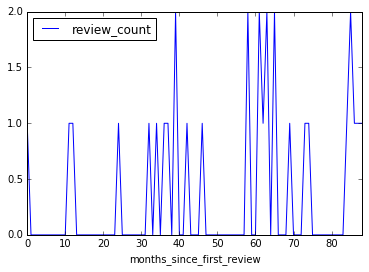

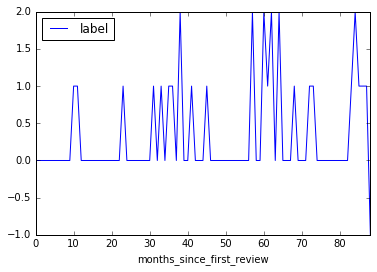

In [296]:
df_feat[df_feat.business_id=='LHyGQnuWR2q44bsrw1ZLAg'].plot('months_since_first_review', 'review_count')
df_feat[df_feat.business_id=='LHyGQnuWR2q44bsrw1ZLAg'].plot('months_since_first_review', 'label')

In [369]:
lab = np.load('data_1/HzwngH6Q2Q6k3Ac9MoS9JA_labels.npy')
t = np.load('data_1/HzwngH6Q2Q6k3Ac9MoS9JA_features.npy')
# temp = t[:,38]
# np.mean(temp[temp!=np.array(None)])
# t[]
pd.DataFrame(t, columns=cols) 
# t

,latitude,longitude,price_range,one_hot_,one_hot_AK,one_hot_AL,one_hot_AZ,one_hot_BW,one_hot_CA,one_hot_EDH,...,months_since_first_review,review_count,total_review_count,avg_stars_for_month,cum_rating,votes_funny,votes_cool,votes_useful,tip_count,total_tip_count
0,36.1261,-115.224,2,0,0,0,0,0,0,0,...,0,0,0,0,None,0,0,0,1,1
1,36.1261,-115.224,2,0,0,0,0,0,0,0,...,1,0,0,0,None,0,0,0,0,1
2,36.1261,-115.224,2,0,0,0,0,0,0,0,...,2,0,0,0,None,0,0,0,0,1
3,36.1261,-115.224,2,0,0,0,0,0,0,0,...,3,0,0,0,None,0,0,0,0,1
4,36.1261,-115.224,2,0,0,0,0,0,0,0,...,4,0,0,0,None,0,0,0,0,1
5,36.1261,-115.224,2,0,0,0,0,0,0,0,...,5,0,0,0,None,0,0,0,0,1
6,36.1261,-115.224,2,0,0,0,0,0,0,0,...,6,0,0,0,None,0,0,0,0,1
7,36.1261,-115.224,2,0,0,0,0,0,0,0,...,7,0,0,0,None,0,0,0,0,1
8,36.1261,-115.224,2,0,0,0,0,0,0,0,...,8,0,0,0,None,0,0,0,0,1
9,36.1261,-115.224,2,0,0,0,0,0,0,0,...,9,0,0,0,None,0,0,0,0,1


In [352]:
%%sql
WITH businesses AS (
	    SELECT *
	    FROM business_info
	    WHERE business_id = 'C6_IoaDD3mddplTXdbKGEg'
	), business_review AS( --review stats per year-month
	    SELECT businesses.business_id, year, month, COUNT() AS review_count, AVG(review.stars) AS avg_stars,
	              SUM(votes_funny) AS votes_funny, SUM(votes_cool) AS votes_cool, SUM(votes_useful) AS votes_useful
	    FROM businesses
	    INNER JOIN review ON businesses.business_id=review.business_id
	    GROUP BY businesses.business_id, year, month
	), business_tip AS( --tip count per year-month
	    SELECT businesses.business_id, year, month, COUNT() AS tip_count
	    FROM businesses
	    INNER JOIN tip ON businesses.business_id=tip.business_id
	    GROUP BY businesses.business_id, year, month
	), combined AS (--Use two left joins to do full outer join on business_id, year, month
	    SELECT business_review.*, business_tip.business_id AS business_id_2, business_tip.year AS year_2, 
	            business_tip.month AS month_2, business_tip.tip_count
	    FROM business_review 
	    LEFT JOIN business_tip 
	        ON business_review.business_id = business_tip.business_id
	        AND business_review.year = business_tip.year
	        AND business_review.month = business_tip.month
	    UNION ALL
	    SELECT business_review.*, business_tip.*
	    FROM business_tip
	         LEFT JOIN business_review
	            ON business_review.business_id = business_tip.business_id
	            AND business_review.year = business_tip.year
	            AND business_review.month = business_tip.month
	    WHERE business_review.business_id IS NULL
	) --finally construct table with both reviews and tips. Combine business_id, year, and month columns into one
	SELECT CASE WHEN business_id IS NULL THEN business_id_2 ELSE business_id END AS business_id,
	        CASE WHEN business_id IS NULL THEN year_2 ELSE year END AS year,
	        CASE WHEN business_id IS NULL THEN month_2 ELSE month END AS month,
	        COALESCE(review_count, 0) AS review_count, avg_stars, COALESCE(votes_funny, 0) AS votes_funny,
	        COALESCE(votes_cool, 0) AS votes_cool, COALESCE(votes_useful, 0) AS votes_useful,
	        COALESCE(tip_count, 0) AS tip_count
	FROM combined
	ORDER BY year, month

Done.


business_id,year,month,review_count,avg_stars,votes_funny,votes_cool,votes_useful,tip_count
C6_IoaDD3mddplTXdbKGEg,2016,7,24,4.95833333333,38,68,75,3


In [320]:
import random
tt = np.load('business_list.npy')
b = random.choice(tt)
np.load('data_1/' + b + '_features.npy').shape

(103, 44)

In [324]:
'one_hot' not in 'one_h_AZ'

True

In [334]:
with open('columns.csv','r') as f:
    cols = f.readline().strip().split(',')
# get all non one hot encoding columns
cols_to_scale = [name for name in cols if 'one_hot' not in name] 

In [336]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

In [337]:
scaler = StandardScaler()
df_train_temp = pd.DataFrame(t, columns=cols)
df_train_temp[cols_to_scale] = scaler.fit_transform(df_train_temp[cols_to_scale])

In [339]:
cols_to_scale

['latitude',
 'longitude',
 'price_range',
 'month',
 'months_since_first_review',
 'review_count',
 'total_review_count',
 'avg_stars_for_month',
 'cum_rating',
 'votes_funny',
 'votes_cool',
 'votes_useful',
 'tip_count',
 'total_tip_count']

In [377]:
a=np.array([1,2,3,4])
a=a[:,np.newaxis]

In [9]:
np.load('data_1/JOr40jl4PeFSK0JR7VmIyw_labels.npy')

IOError: [Errno 22] Invalid argument

In [14]:
'Model'.lower()

'model'